In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

([], [])

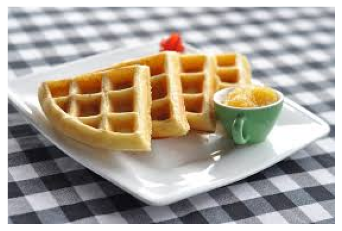

In [5]:
image = cv2.imread('waffle.jpg')

image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)
plt.xticks([])
plt.yticks([])
plt.show()

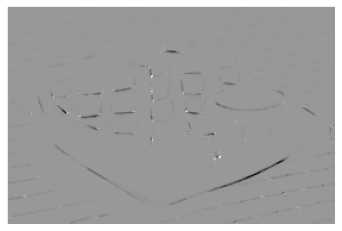

In [6]:
gray = cv2.cvtColor(image_copy,cv2.COLOR_RGBA2GRAY)

gray = np.float32(gray)

#  2 = 2x2 pixels, 3 = sobel size, 0.04 = value << results in more corners detected
dst = cv2.cornerHarris(gray,2,3,0.04)

plt.imshow(dst,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

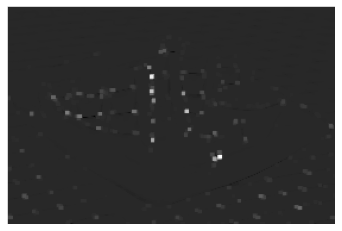

In [8]:
dilated = cv2.dilate(dst,None)

plt.imshow(dilated,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

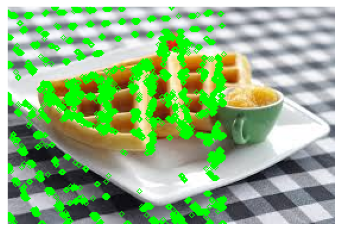

In [19]:
thresh = 0.001 * dilated.max()

corner_image = np.copy(image_copy)

for j in range(0,dilated.shape[0]):
    for i in range(0, dilated.shape[0]):
        if(dst[j,i] > thresh):
            cv2.circle(corner_image,(i,j),2,(0,255,0),1)

plt.imshow(corner_image)
plt.xticks([])
plt.yticks([])
plt.show()

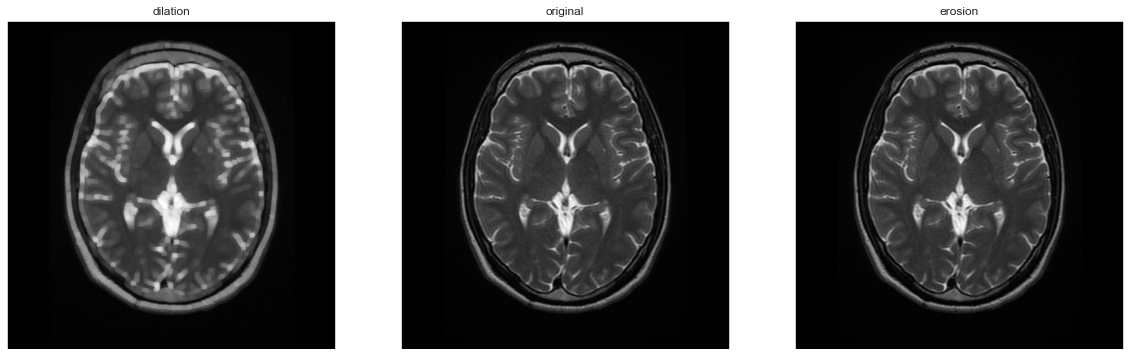

In [26]:
%matplotlib inline
image = cv2.imread('brain_MR.jpg')

image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image_copy, cv2.COLOR_RGBA2GRAY)

kernel = np.ones((5,5),np.uint8)

dilation = cv2.dilate(gray,kernel,iterations=1)
erosion = cv2.erode(gray,kernel, iterations=1)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (20,20))

ax2.imshow(gray,cmap = 'gray')
ax2.set_title('original')
ax1.imshow(dilation,cmap = 'gray')
ax1.set_title('dilation')
ax3.imshow(gray,cmap = 'gray')
ax3.set_title('erosion')

ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])

plt.show()

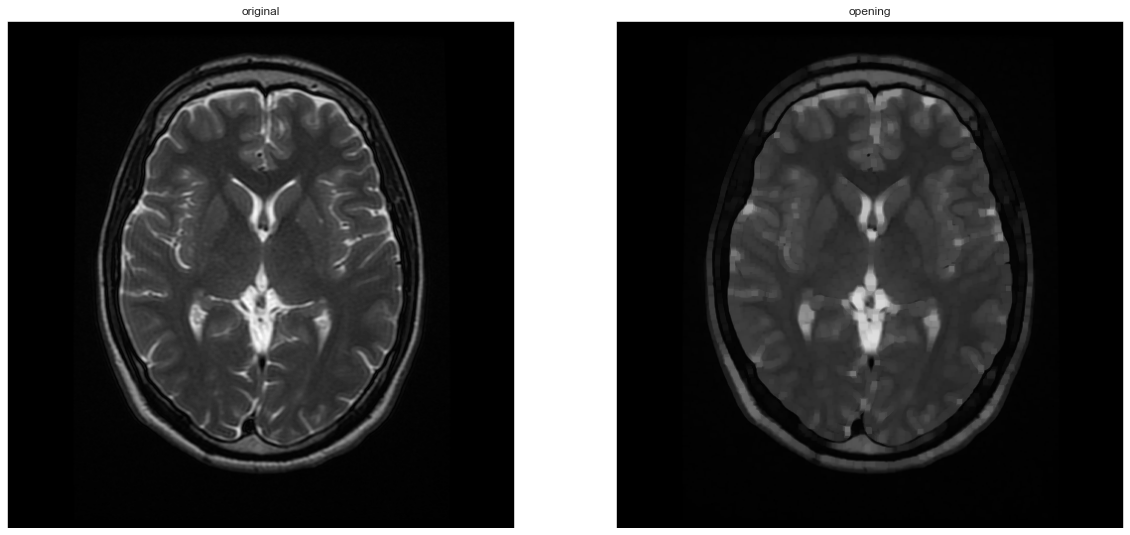

In [32]:
opening = cv2.morphologyEx(image,cv2.MORPH_OPEN,kernel)

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,10))

ax1.imshow(gray,cmap = 'gray')
ax1.set_title('original')
ax2.imshow(opening,cmap = 'gray')
ax2.set_title('opening')

ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])

plt.show()

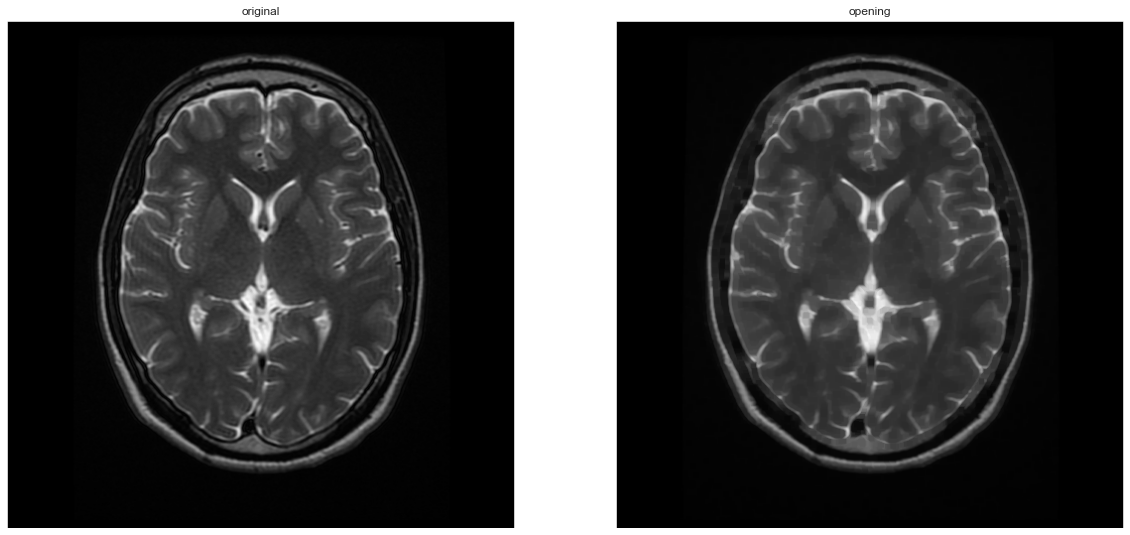

In [33]:
closing = cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernel)

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,10))

ax1.imshow(gray,cmap = 'gray')
ax1.set_title('original')
ax2.imshow(closing,cmap = 'gray')
ax2.set_title('opening')

ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])

plt.show()